# Project 1
## Treyson Grange & Sayali Sali

# First I'm doing some loading and taking a look at our data to find things to analyze

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Just comment out what you don't need 
# allStarFull = pd.read_csv('baseball/core/AllstarFull.csv')
# display(allStarFull.head())

# appearances = pd.read_csv('baseball/core/Appearances.csv')
# display(appearances.head())

# awardsManagers = pd.read_csv('baseball/core/AwardsManagers.csv')
# display(awardsManagers.head())

# awardsPlayers = pd.read_csv('baseball/core/AwardsPlayers.csv')
# display(awardsPlayers.head())

# awardsShareManagers = pd.read_csv('baseball/core/AwardsShareManagers.csv') 
# display(awardsShareManagers.head())

# awardsSharePlayers = pd.read_csv('baseball/core/AwardsSharePlayers.csv')
# display(awardsSharePlayers.head())

# batting = pd.read_csv('baseball/core/Batting.csv')
# display(batting.head())

# battingPost = pd.read_csv('baseball/core/BattingPost.csv')
# display(battingPost.head())

# collegePlaying = pd.read_csv('baseball/core/CollegePlaying.csv')
# display(collegePlaying.head())

# fielding = pd.read_csv('baseball/core/Fielding.csv')
# display(fielding.head())

# fieldingOF = pd.read_csv('baseball/core/FieldingOF.csv')
# display(fieldingOF.head())

# fieldingOFsplit = pd.read_csv('baseball/core/FieldingOFsplit.csv')
# display(fieldingOFsplit.head())

# fieldingPost = pd.read_csv('baseball/core/FieldingPost.csv')
# display(fieldingPost.head())

# hallOfFame = pd.read_csv('baseball/core/HallOfFame.csv')
# display(hallOfFame.head())

# homeGames = pd.read_csv('baseball/core/HomeGames.csv')
# display(homeGames.head())

# managers = pd.read_csv('baseball/core/Managers.csv')
# display(managers.head())

# managersHalf = pd.read_csv('baseball/core/ManagersHalf.csv')
# display(managersHalf.head())

# parks = pd.read_csv('baseball/core/Parks.csv')
# display(parks.head())

# people = pd.read_csv('baseball/core/People.csv')
# display(people.head())

# pitching = pd.read_csv('baseball/core/Pitching.csv')
# display(pitching.head())

# pitchingPost = pd.read_csv('baseball/core/PitchingPost.csv')
# display(pitchingPost.head())

# salaries = pd.read_csv('baseball/core/Salaries.csv')
# display(salaries.head())

# schools = pd.read_csv('baseball/core/Schools.csv')
# display(schools.head())

# seriesPost = pd.read_csv('baseball/core/SeriesPost.csv')
# display(seriesPost.head())

# teams = pd.read_csv('baseball/core/Teams.csv')
# display(teams.head())

# teamsFranchises = pd.read_csv('baseball/core/TeamsFranchises.csv')
# display(teamsFranchises.head())

# teamsHalf = pd.read_csv('baseball/core/TeamsHalf.csv')
# display(teamsHalf.head())
#Thanks copilot!

# Analyses 1: Most improved player throughout their career

In [11]:
# AB = At Bats
# H = Hits
# HR = Home Runs
# RBI = Runs Batted In
# SB = Stolen Bases
# CS = Caught Stealing
# BB = Walks
# SO = Strikeouts
# IBB = Intentional Walks
# HBP = Hit By Pitch
# SH = Sacrifice Hits
# SF = Sacrifice Flies

batting = pd.read_csv('baseball/core/Batting.csv')
#rid some columns
batting = batting[['playerID', 'yearID', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#rid nan
batting = batting.dropna()

#get first and last year
battingFirst = batting.groupby('playerID').first()


battingLast = batting.groupby('playerID').last()

#merge
battingFirstLast = pd.merge(battingFirst, battingLast, on='playerID')

#now we subtract to find their progress.
battingFirstLast['AB'] = battingFirstLast['AB_y'] - battingFirstLast['AB_x']
battingFirstLast['H'] = battingFirstLast['H_y'] - battingFirstLast['H_x']
battingFirstLast['HR'] = battingFirstLast['HR_y'] - battingFirstLast['HR_x']
battingFirstLast['RBI'] = battingFirstLast['RBI_y'] - battingFirstLast['RBI_x']
battingFirstLast['SB'] = battingFirstLast['SB_y'] - battingFirstLast['SB_x']
battingFirstLast['CS'] = battingFirstLast['CS_y'] - battingFirstLast['CS_x']
battingFirstLast['BB'] = battingFirstLast['BB_y'] - battingFirstLast['BB_x']
battingFirstLast['SO'] = battingFirstLast['SO_y'] - battingFirstLast['SO_x']
battingFirstLast['IBB'] = battingFirstLast['IBB_y'] - battingFirstLast['IBB_x']
battingFirstLast['HBP'] = battingFirstLast['HBP_y'] - battingFirstLast['HBP_x']
battingFirstLast['SH'] = battingFirstLast['SH_y'] - battingFirstLast['SH_x']
battingFirstLast['SF'] = battingFirstLast['SF_y'] - battingFirstLast['SF_x']

#rid more columns
battingFirstLast = battingFirstLast[['AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']] 

battingFirstLast['Sum'] = battingFirstLast.sum(axis=1)

#sort
battingFirstLast = battingFirstLast.sort_values(by=['Sum'], ascending=False)
battingFirstLast = battingFirstLast.drop(columns=['Sum'])

#get name
people = pd.read_csv('baseball/core/People.csv')

#merge with names
battingFirstLastName = pd.merge(battingFirstLast, people, on='playerID')

battingFirstLastName = battingFirstLastName[['nameFirst', 'nameLast', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#show top 10
battingFirstLastName = battingFirstLastName.head(5)

#getnames
battingFirstLastName['nameFirst'] = battingFirstLastName['nameFirst'] + ' '
battingFirstLastName['nameLast'] = battingFirstLastName['nameLast'] + ' '
battingFirstLastName['name'] = battingFirstLastName['nameFirst'] + battingFirstLastName['nameLast']

# Now let's get rid of the columns we don't need
battingFirstLastName = battingFirstLastName[['name', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]
display(battingFirstLastName)

#now lets make a graph using seaborn




,name,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF
0,Jonathan Schoop,608,178,31,104.0,1.0,0.0,34,140.0,0.0,11.0,0.0,7.0
1,Nelson Cruz,551,159,39,119.0,1.0,1.0,68,140.0,7.0,12.0,0.0,7.0
2,Charlie Blackmon,546,188,36,96.0,9.0,9.0,62,127.0,8.0,10.0,2.0,3.0
3,Nick Castellanos,596,162,26,101.0,4.0,5.0,41,141.0,0.0,5.0,0.0,5.0
4,Aaron Judge,458,139,48,104.0,9.0,3.0,118,166.0,11.0,4.0,0.0,3.0


## Most Improved Player based on multiple arguments
I asked the internet what goes into the arguement for the 'best player' and it told me that some of the most important were
- Home Runs
- Runs Batted In
- Stolen Bases
- Walks
- Hits


The most improved player is: Aaron Judge 


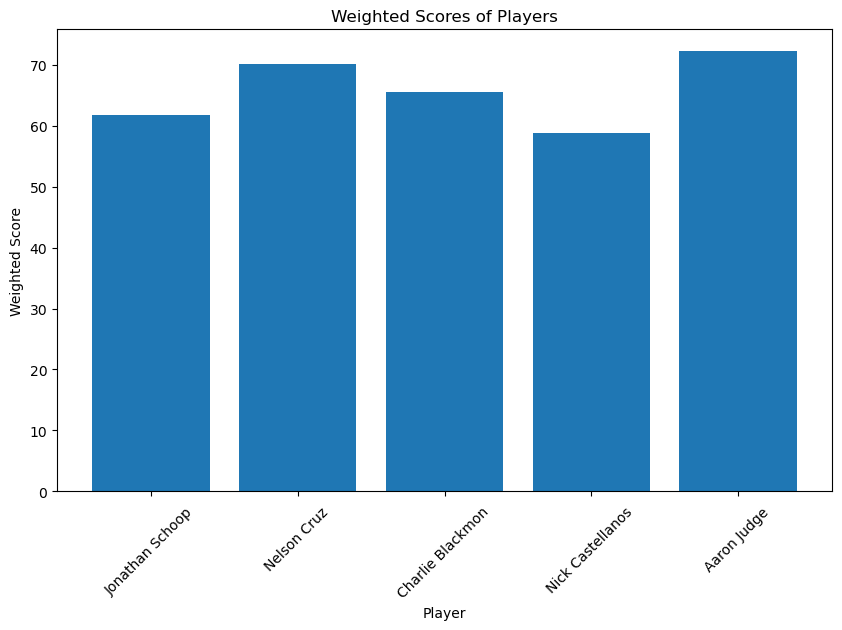

In [16]:
# Calculate weighted score for each player
battingFirstLastName['Score'] = (battingFirstLastName['HR'] * 0.3) + (battingFirstLastName['RBI'] * 0.3) + (battingFirstLastName['SB'] * 0.1) + (battingFirstLastName['BB'] * 0.1) + (battingFirstLastName['H'] * 0.1)

# Find the player with the highest score
best_player = battingFirstLastName.loc[battingFirstLastName['Score'].idxmax()]

# Print the best player
print("The most improved player is:", best_player['name'])
# Plot the weighted scores
plt.figure(figsize=(10, 6))
plt.bar(battingFirstLastName['name'], battingFirstLastName['Score'])
plt.xlabel('Player')
plt.ylabel('Weighted Score')
plt.title('Weighted Scores of Players')
plt.xticks(rotation=45)
plt.show()


But if we are just dealing with their "At Bats" the results are very different.

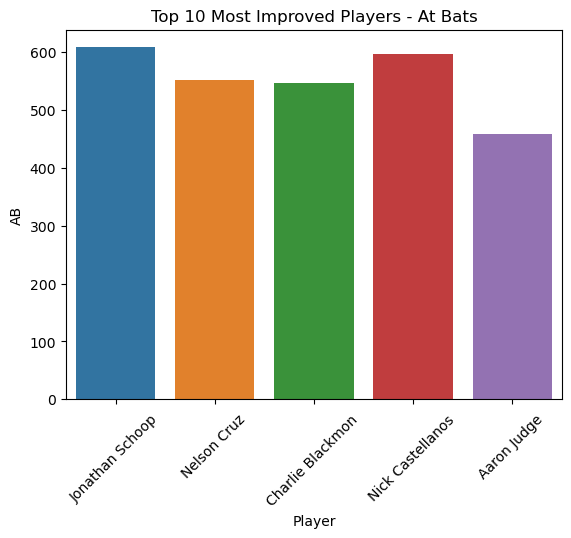

In [13]:
sns.barplot(data=battingFirstLastName, x='name', y='AB')
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('AB')
plt.title('Top 10 Most Improved Players - At Bats')
plt.show()


IDEAS:
- What player had the most improvement over his career?
- Are there correlations between who is winning the "allstar" and what team they are on?
- How often do players from certain colleges go to a certain MLB team?
- Defenitely something to do with the salaries table, maybe what how the top salaries did in college or something similar. 
- Who was the worst pitcher in the league over the years, and how bad was he comparitavely. 